In [123]:
import qiskit
import sys
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from qiskit import execute
from qiskit.circuit import Parameter,ControlledGate
from qiskit import Aer
import random
import time
from torchsummary import summary
from collections import defaultdict

import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

from qiskit import *
provider = qiskit
backend = Aer.get_backend("aer_simulator", device="GPU")

In [124]:
class QCNeuron():
    def __init__(self, n_qubits, backend, shots):
        self.qc = qiskit.QuantumCircuit(n_qubits)
        n_qubits = n_qubits
        thetas = {k : Parameter('Theta'+str(k))for k in range(2*n_qubits)}
        
        all_qubits = [i for i in range(n_qubits)]
        qc.h(all_qubits)
        qc.barrier()

        #circuit.h(0)

        for k in range(0, 4):
          qc.ry(thetas[k], k)

        # qc.barrier()
        # qc.cx(1, 0)
        # qc.cx(2, 0)
        # qc.cx(3, 0)
        # qc.cx(2, 1)
        # qc.cx(3, 1)
        # qc.cx(3, 2)
        # qc.barrier()

        # for k in range(0, 4):
        #   qc.ry(thetas[k+4], k)

        qc.measure_all()
        # ---------------------------
        
        backend = backend
        shots = shots

        tqc = transpile(qc, backend=backend)


    def N_qubit_expectation_Z(self,counts, shots, nr_qubits):
        expects = np.zeros(len(QC_OUTPUTS))
        for k in range(len(QC_OUTPUTS)):
            key = QC_OUTPUTS[k]
            perc = counts.get(key, 0)/shots
            expects[k] = perc
        return expects

    def run(self, i):
        params = i.cpu().data.numpy()
        parameters = {}

        for k in range(2*n_qubits):
          parameters[thetas[k]] = params[k].item()

        qobj = assemble(tqc,
                        shots=shots,
                        parameter_binds = [parameters])

        job = backend.run(qobj)
        res =  N_qubit_expectation_Z(job.result().get_counts(), shots, n_qubits)
        return res

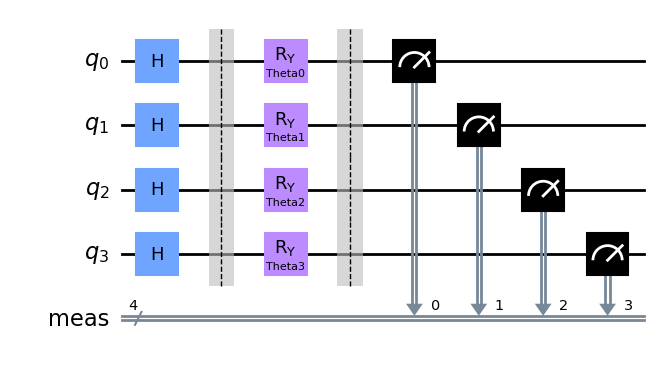

In [125]:
QC = QCNeuron(4, Aer.get_backend('aer_simulator', device="GPU"), 5000)
QC.qc.draw(fold=2000, output='mpl')

In [130]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qcircha.expressivity import compute_espressivity

In [132]:
c = compute_espressivity(4, 4, feature_map=QC.qc, var_ansatz=QC.qc, backend='Aer', path=None, plot=True, save=False)

SyntaxError: invalid syntax (1755612731.py, line 1)

Derivative of the function $ f(x) = sin(x) $ is identical to $ f(x) = \frac{1}{2}sin(x + \frac{\pi}{2}) - \frac{1}{2}sin(x - \frac{\pi}{2}) $

Derivative of the function $ f(x) = sin(x) $ is identical to $ f(x) = \frac{1}{2}sin(x + \frac{\pi}{2}) - \frac{1}{2}sin(x - \frac{\pi}{2}) $

In [7]:
import qiskit 
from qiskit.circuit import * 
from qiskit.quantum_info import *

n_qubits=4
qc = qiskit.QuantumCircuit(n_qubits)
n_qubits = n_qubits
thetas = {k : Parameter('Theta'+str(k))for k in range(2*n_qubits)}

all_qubits = [i for i in range(n_qubits)]
qc.h(all_qubits)
qc.barrier()

state = Statevector(qc)
state.draw("Latex")


<IPython.core.display.Latex object>

In [ ]:

for k in range(0, 4):
  qc.ry(thetas[k], k)

qc.barrier()

qc.cx(1, 0)
qc.cx(2, 0)
qc.cx(3, 0)
qc.cx(2, 1)
qc.cx(3, 1)
qc.cx(3, 2)
qc.barrier()

for k in range(0, 4):
  qc.ry(thetas[k+4], k)

qc.measure_all()


In [ ]:
qc = QCNeuron(4, )